# List 1

## 1. Iteracyjne rozwiązywanie równań nieliniowych

### 1.1. Metoda bisekcji

### 1.1.1. Zasada kontrakcji Banacha

Definicja 1.1 (Odwzorowanie zwężające). Niech ( $X, \rho$ ) będzie przestrzenia metryczną. Mówimy, że odwzorowanie $\Phi: X \rightarrow X$ jest zwężające, jeśli istnieje stała $k \in(0 ; 1)$ taka, że dla dowolnych $x, y \in X$ zachodzi nierówność $\rho(\Phi(x), \Phi(y)) \leqslant k \rho(x, y)$.

Definicja 1.2 (Zasada kontrakcji Banacha). Niech ( $X, \rho$ ) będzie przestrzenia metryczna zupetna i niech $\Phi: X \rightarrow X$ będzie kontrakcja. Wtedy:

1. Odwzorowanie $\Phi$ jest ciagłe.
2. Odwzorowanie $\Phi$ ma doktadnie jeden punkt stały $x^{*} \in X, x^{*}=\Phi(x *)$.
3. Ciag iteracji $x_{n+1}=\Phi\left(x_{n}\right)$, dla kȧ̇dego $x_{0} \in X$, jest zbieżny do $x^{*}$, gdy $n \rightarrow \infty$.

### 1.1.2. Twierdzenie Darboux

Twierdzenie 1.1 (Darboux). Niech $f:[a, b] \rightarrow \mathbb{R}$ będzie funkcja ciagła. Jeśli $f(a) f(b)<0$, to istnieje taki punkt $c \in(a, b)$, dla którego $f(c)=0$.

### 1.1.3. Algorytm

1. Przyjmujemy $a_{0}=a, b_{0}=b, c_{n}=\frac{a_{n}+b_{n}}{2}, n \geqslant 0$.
2. Wyznaczamy wartości $f\left(a_{n}\right)$ i $\mathrm{f}\left(c_{n}\right)$.

$$
\begin{aligned}
& \text { Jeśli } f\left(a_{n}\right) f\left(c_{n}\right)>0 \text { to przyjmujemy } a_{n+1}=c_{n} \text { i } b_{n+1}=b_{n} \text {. } \\
& \text { Jeśli } f\left(a_{n}\right) f\left(c_{n}\right)<0 \text { to przyjmujemy } a_{n+1}=a_{n} \text { i } b_{n+1}=c_{n} .
\end{aligned}
$$

Jako warunek zakończenia algorytmu możemy przyjąć jedno z kryteriów: $\left|b_{n}-a_{n}\right|<\delta$ lub $\left|f\left(c_{n}\right)\right|<\varepsilon$, gdzie $\delta>0$ i $\varepsilon>0$ są ustalonymi na początku wielkościami zapewniającymi oczekiwaną dokładność aproksymacji.

In [1]:
import sys
import os
sys.path.append("..")
import matplotlib.pyplot as plt
import numpy as np
from src.root import bisection_method, newton_method, secant_method, convergence_rate, transform_midpoints

Root found: (6.0, [5.6, 5.85, 5.975, 6.0375, 6.00625, 5.990625, 5.9984375, 6.00234375, 6.000390625, 5.9994140625, 5.99990234375, 6.000146484375, 6.0000244140625, 5.99996337890625, 5.999993896484375, 6.000009155273437, 6.000001525878906, 5.99999771118164, 5.999999618530273, 6.0000005722045895, 6.000000095367431, 5.999999856948852, 5.999999976158142, 6.0000000357627865, 6.000000005960464, 5.999999991059303, 5.9999999985098835, 6.000000002235174, 6.000000000372529, 5.999999999441206, 5.999999999906867, 6.000000000139698, 6.000000000023283, 5.999999999965075, 5.999999999994179, 6.000000000008731, 6.000000000001455, 5.999999999997817, 5.999999999999636, 6.000000000000545, 6.000000000000091, 5.999999999999863, 5.999999999999977, 6.000000000000034, 6.000000000000005, 5.999999999999991, 5.999999999999998, 6.000000000000002, 6.0])


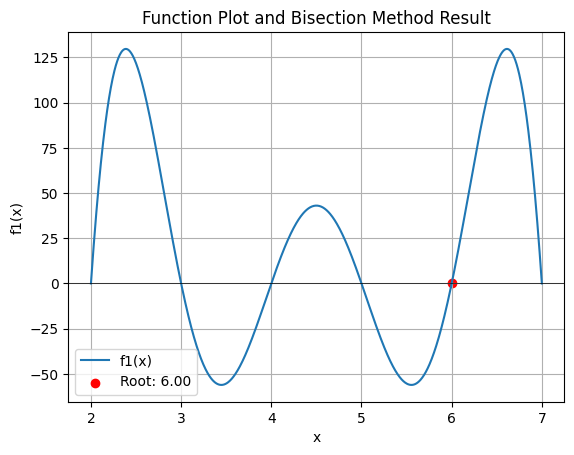

In [2]:

def f1(x):
    return (x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)*(x-7)*(x-8)

result = bisection_method(f1, 5.1, 6.1)
print(f"Root found: {result}")

x_values = np.linspace(2, 7, 1000)
y_values = f1(x_values)
plt.plot(x_values, y_values, label="f1(x)")
plt.xlabel("x")
plt.ylabel("f1(x)")
plt.title("Function Plot and Bisection Method Result")

plt.axhline(0, color='black', lw=0.5)
plt.scatter(result[0], f1(result[0]), color='red', label=f"Root: {result[0]:.2f}")
plt.legend()
plt.grid()
plt.show()


### 1.1.4. Twierdzenie o zbieżności

Twierdzenie 1.2 (o zbieżności metody bisekcji). Niech $\left[a_{0}, b_{0}\right],\left[a_{1}, b_{1}\right], \ldots,\left[a_{n}, b_{n}\right]$ będzie ciagiem przedziałów skonstruowanych przy pomocy metody bisekcji. Wówczas ciagi $\left\{a_{n}\right\}$ i $\left\{b_{n}\right\}$ sa zbieżne $i$

$$
\lim _{n \rightarrow \infty} a_{n}=\lim _{n \rightarrow \infty} b_{n}=x^{*},
$$
gdzie  $\left(x^{*}\right)=0$ Jeśli $c_{n}=\frac{a_{n}+b_{n}}{2}$ to $x^{*}=\lim _{n \rightarrow \infty} c_{n}$ oraz

$$
\qquad\left|c_{n}-x^{*}\right| \leqslant \frac{1}{2^{n+1}}\left(b_{0}-a_{0}\right) .
$$


In [3]:
from src.root import convergence_rate, transform_midpoints

x0, xn = bisection_method(f1, 5.1, 6.1)
slope, intercept = convergence_rate(xn, x0)
Xn, Yn = transform_midpoints(xn, x0)

def plot_convergence_rate(Xn, Yn, slope, intercept):
    plt.scatter(Xn, Yn, label="Transformed Midpoints")

    xs = np.linspace(min(Xn), max(Xn), 100)
    ys = slope * xs + intercept
    plt.plot(xs, ys, color='red', label="Regression Line")

    plt.xlabel("Xn")
    plt.ylabel("Yn")
    plt.title("Convergence Rate Visualization")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Slope (a): {slope}, Intercept (b): {intercept}")

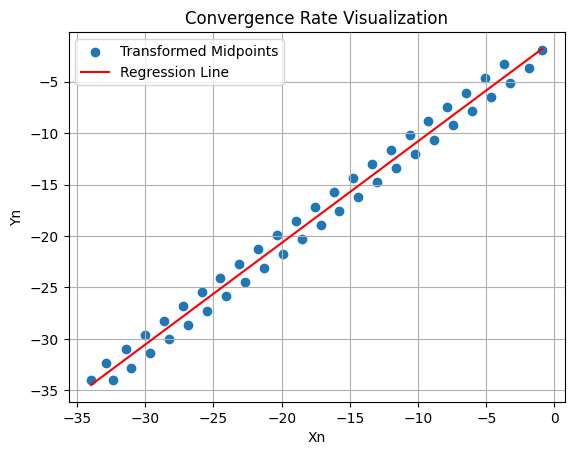

Slope (a): 0.9888927922336322, Intercept (b): -0.8994508057301333


In [4]:
plot_convergence_rate(Xn, Yn, slope, intercept)


### 1.2. Metoda Newtona

### 1.2.1. Algorytm

Aby skonstruować metodę Newtona, rozważmy rozwinięcie Taylora funkcji $f(x)$ w otoczeniu punktu $x_{n}$,

$$
f(x)=f\left(x_{n}\right)+f^{\prime}\left(x_{n}\right)\left(x-x_{n}\right)+O\left(\left(x-x_{n}\right)^{2}\right) .
$$

Przyjmując $x=x_{n+1}$ otrzymujemy przybliżenie:

$$
\begin{aligned}
f\left(x_{n+1}\right) & \approx f\left(x_{n}\right)+f^{\prime}\left(x_{n}\right)\left(x_{n+1}-x_{n}\right), \\
x_{n+1} & \approx x_{n}-\frac{f\left(x_{n}\right)}{f^{\prime}\left(x_{n}\right)},
\end{aligned}
$$

dla $n \geqslant 0$, gdzie $x_{0}$ jest zadanym punktem początkowym.
Jako warunek zakończenia algorytmu możemy przyjąć jedno z kryteriów: $\left|x_{n+1}-x_{n}\right|<\delta$ lub $\left|f\left(x_{n+1}\right)\right|<\varepsilon$, gdzie $\delta>0$ i $\varepsilon>0$ są ustalonymi na początku wielkościami zapewniającymi oczekiwaną dokładność aproksymacji.

Metoda ta nie zawsze jest zbieżna (zbieżność lokalna).

### 1.2.2. Twierdzenie o lokalnej zbieżności

Twierdzenie 1.3 (o lokalnej zbieżności metody Newtona). Zakładamy, że $f \in C^{2}([a, b])$ oraz $f\left(x^{*}\right)=0$ i $f^{\prime}\left(x^{*}\right) \neq 0$ ( $x^{*}$ jest pierwiastkiem jednokrotnym). Wtedy istnieje otoczenie punktu $x^{*} i$ stała $C>0$ takie, że jeśli $x_{0}$ należy do otoczenia $x^{*}$, to ciag konstruowanych przez metode Newtona przybliżeń $\left\{x_{n}\right\}$ spetnia nierówność

$$
\left|x_{n+1}-x^{*}\right| \leqslant C\left|x_{n}-x^{*}\right|^{2}
$$

oraz $\lim _{n \rightarrow \infty} x_{n}=x^{*}$.
Uwaga Niech $x^{*}$ będzie podwójnym zerem funkcji $f$, tzn. $f\left(x^{*}\right)=f^{\prime}\left(x^{*}\right)=$ $0 i f^{\prime \prime}\left(x^{*}\right) \neq 0$. Jeśli $f^{\prime \prime}(x)$ jest ciagła, to metoda Newtona jest zbieżna liniowo.

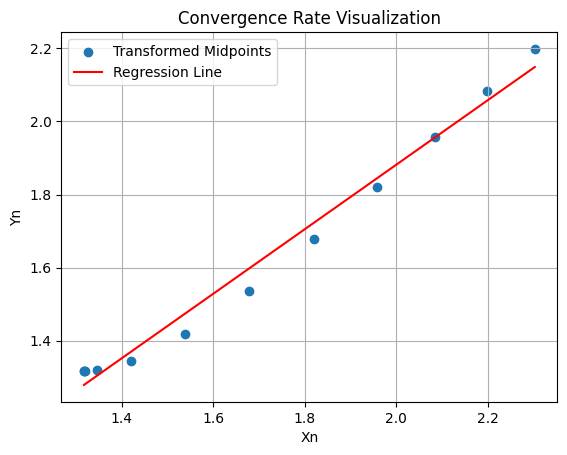

Slope (a): 0.8830964817556161, Intercept (b): 0.11560474813060838


In [5]:
from src.root import newton_method, transform_midpoints
import numpy as np
import matplotlib.pyplot as plt

def f3(x):
    return np.e**x - 3 * x**2

x_values = np.linspace(-1, 1, 100)
y_values = f3(x_values)

xn = newton_method(f3, 10)
Xn, Yn = transform_midpoints(xn, 0)
slope, intercept = np.polyfit(Xn, Yn, 1)

plot_convergence_rate(Xn, Yn, slope, intercept)


### 1.3. Metoda siecznych

Zakładamy, że $f \in C^{2}([a, b])$ oraz $f\left(x^{*}\right)=0$ i $f^{\prime}\left(x^{*}\right) \neq 0\left(x^{*}\right.$ jest pierwiastkiem jednokrotnym). W konstrukcji metody siecznych korzystamy z przybliżenia pochodnej funkcji f w punkcie $x_{n}$ ilorazem różnicowym, tzn.,

$$
\begin{aligned}
f^{\prime}\left(x_{n}\right) & =\frac{f\left(x_{n}\right)-f\left(x_{n-1}\right)}{x_{n}-x_{n-1}}, \\
x_{n+1} & \approx x_{n}-\frac{f\left(x_{n}\right)}{f^{\prime}\left(x_{n}\right)} \approx x_{n}-\frac{f\left(x_{n}\right)}{\frac{f\left(x_{n}\right)-f\left(x_{n-1}\right)}{x_{n}-x_{n-1}}},
\end{aligned}
$$

dla $n \geqslant 1$, gdzie $x_{0}$ i $x_{1}$ są zadanymi punktami początkowymi.
Jako warunek zakończenia algorytmu możemy przyjąć jedno z kryteriów: $\left|b_{n}-a_{n}\right|<\delta$ lub $\left|f\left(c_{n}\right)\right|<\varepsilon$, gdzie $\delta>0$ i $\varepsilon>0$ są ustalonymi na początku wielkościami zapewniającymi oczekiwaną dokładność aproksymacji.

### 1.3.1. Twierdzenie o lokalnej zbieżności

Twierdzenie 1.4 (o lokalnej zbieżności metody siecznych). Niech $f \in C^{2}([a, b])$ oraz $f\left(x^{*}\right)=0$ i $f^{\prime}\left(x^{*}\right) \neq 0$ ( $x^{*}$ jest pierwiastkiem jednokrotnym). Wtedy istnieje otoczenie $U$ punktu $x^{*} i$ stała $K$ takie, ̇̇e jeśli przybliżenia poczatkowe $x_{0}, x_{1} \in U$, to ciag $\left\{x_{n}\right\}$ skonstruowany za pomoca metody siecznych spetnia nierówność

$$
\left|x_{n+1}-x^{*}\right| \leqslant K\left|x_{n}-x^{*}\right|^{\frac{1+\sqrt{5}}{2}}
$$

oraz $\lim _{n \rightarrow \infty} x_{n}=x^{*}$.

In [6]:
from src.root import secant_method

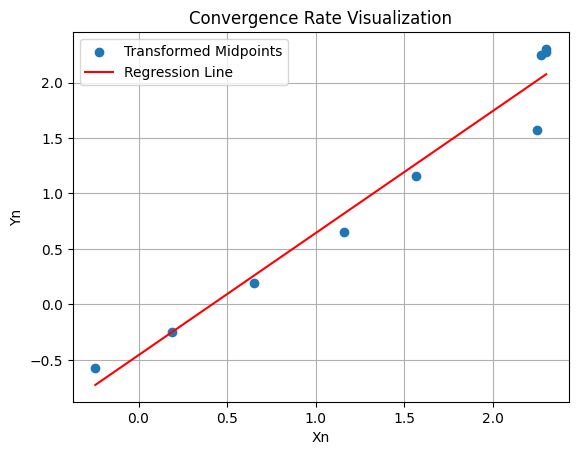

Slope (a): 1.0994562509529227, Intercept (b): -0.45679380721547225


In [ ]:
def f4(x):
    return np.e**x - 3 * x**2

xn = secant_method(f4, -10, 10, 10)
Xn, Yn = transform_midpoints(xn, 0)
slope, intercept = np.polyfit(Xn, Yn, 1)
plot_convergence_rate(Xn, Yn, slope, intercept)



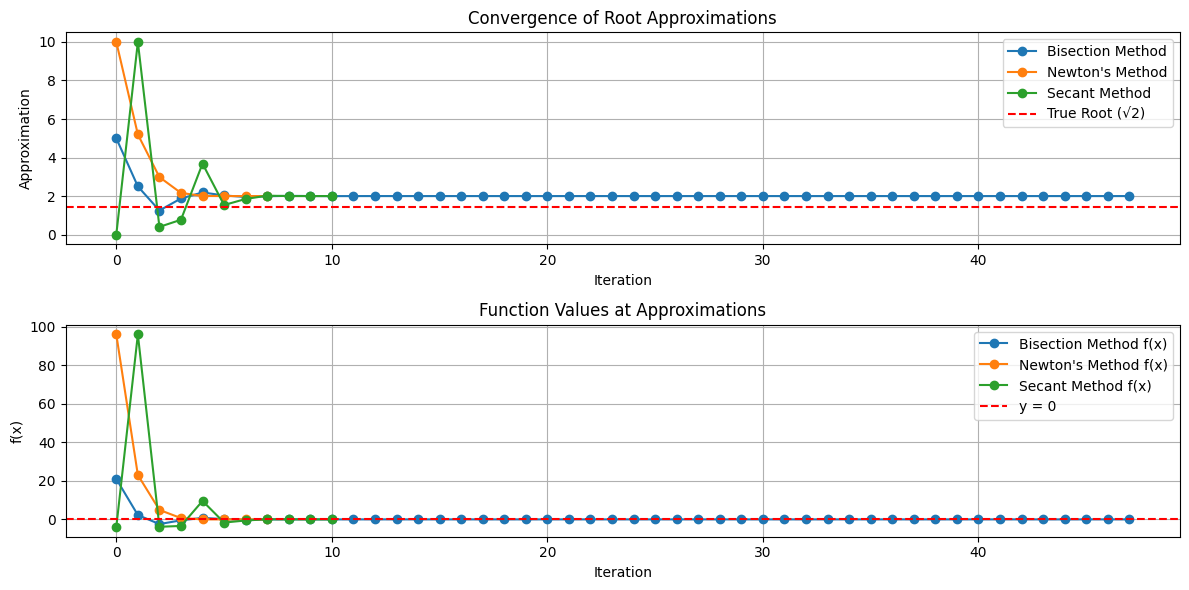

In [ ]:
def f(x, a=4):
    """Defines the function f(x) = x^2 - a."""
    return x**2 - a

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

bisection_x = bisection_method(f, 0, 10)[1]
axs[0].plot(bisection_x, marker='o', label="Bisection Method")

newton_x = newton_method(f, 10)
axs[0].plot(newton_x, marker='o', label="Newton's Method")

secant_x = secant_method(f, 0, 10, 20)
axs[0].plot(secant_x, marker='o', label="Secant Method")

axs[0].axhline(y=2**(1/2), linestyle="--", color="red", label="True Root (√2)")
axs[0].set_title("Convergence of Root Approximations")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Approximation")
axs[0].legend()
axs[0].grid()

axs[1].plot([f(x) for x in bisection_x], marker='o', label="Bisection Method f(x)")
axs[1].plot([f(x) for x in newton_x], marker='o', label="Newton's Method f(x)")
axs[1].plot([f(x) for x in secant_x], marker='o', label="Secant Method f(x)")

axs[1].axhline(y=0, linestyle="--", color="red", label="y = 0")
axs[1].set_title("Function Values at Approximations")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("f(x)")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()